In [15]:
import numpy

from modules.client import OffVarianceClient
import modules.utils as utils
from pandas import DataFrame
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

C:\Users\user\offvariance\notebooks\modules\utils.py:428: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp_g_03_H_cop'] = df['team1_all_xgpower-03_cop_xg90noindex'] * df['team2_all_xgpower-03_com_xga90index']
C:\Users\user\offvariance\notebooks\modules\utils.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp_g_03_A_cop'] = df['team2_all_xgpower-03_cop_xg90noindex'] * df['team1_all_xgpower-03_com_xga90index']
C:\Users\user\offvariance\notebooks\modules\utils.py:430: PerformanceWarning: DataFrame is highly fragment

In [16]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win1'] >= 1.8) & (games_df['odds_open_win1'] <= 2.7) &
(games_df['odds_open_tb25'] >= 1.6) & (games_df['odds_open_tb25'] <= 2.5)
]

In [17]:
segmented_df.shape

(613, 1640)

In [18]:
segmented_sort_by_odds_df = segmented_df.sort_values(by=['odds_open_win1'])
print(segmented_sort_by_odds_df['odds_open_win1'][25:50])

1866    1.840
688     1.840
1394    1.840
752     1.840
1423    1.840
2072    1.840
1471    1.840
2168    1.847
984     1.850
1408    1.850
1868    1.850
1095    1.850
1068    1.850
210     1.850
2183    1.854
1441    1.860
1050    1.860
822     1.870
2074    1.870
932     1.870
1840    1.870
215     1.870
758     1.870
1052    1.870
2155    1.877
Name: odds_open_win1, dtype: float64


In [19]:
numpy.percentile(segmented_df['simple_expected_total_value'],85)

5.66

In [20]:
segmented_df.describe()

,id,date_match_unix,time_first,time_match,team_1_id,team_1_goal,team_2_id,team_2_goal,country_id,league_id,...,profit_win1_open,profit_win1_close,profit_draw_open,profit_draw_close,profit_win2_open,profit_win2_close,profit_tm25_open,profit_tm25_close,profit_tb25_open,profit_tb25_close
count,613.000000,6.130000e+02,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.0,613.0,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,79986.445351,1.561003e+09,47.207178,94.523654,8419.729201,1.415987,8545.368679,1.076672,291.0,325.0,...,-0.008227,0.004887,-0.049984,-0.055742,-0.053948,-0.050179,0.026796,0.028724,-0.104326,-0.077566
std,34250.268256,5.312692e+07,1.694227,1.826148,3543.638455,1.109174,3786.886101,1.059810,0.0,0.0,...,1.102068,1.128659,1.550877,1.542672,1.579067,1.609376,0.944836,0.953039,0.996494,1.033542
min,15214.000000,1.475258e+09,45.000000,92.000000,6711.000000,0.000000,6711.000000,0.000000,291.0,325.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,57878.000000,1.514045e+09,46.000000,93.000000,6719.000000,1.000000,6719.000000,0.000000,291.0,325.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,85149.000000,1.556312e+09,47.000000,94.000000,6723.000000,1.000000,6723.000000,1.000000,291.0,325.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.630000,0.600000,-1.000000,-1.000000
75%,101906.000000,1.609265e+09,48.000000,95.000000,6731.000000,2.000000,6731.000000,2.000000,291.0,325.0,...,1.120000,1.140000,2.200000,2.170000,1.770000,1.510000,0.860000,0.860000,0.930000,0.960000
max,145802.000000,1.648908e+09,71.000000,113.000000,26972.000000,6.000000,26972.000000,5.000000,291.0,325.0,...,1.700000,2.720000,2.970000,3.500000,3.990000,4.980000,1.440000,1.810000,1.440000,1.810000


Count: 613
Open profit: -5.042999999999999
Close profit: 2.9960000000000058
Open ROI: -0.008226753670473081
Close ROI: 0.004887438825448623
UDI: -0.022198569345572385
AxesSubplot(0.125,0.125;0.775x0.755)


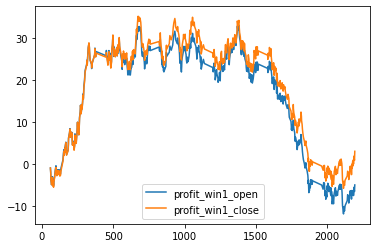

In [21]:
utils.print_home_win_result(segmented_df)

In [22]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
exp_diff_H_A,0.183261
exp_diff_A_H,-0.183261
exp_diff_03_A_H,-0.180485
exp_diff_03_H_A,0.180485
paper_diff_03_H_A,0.146330
...,...
exp_g_total_03_loc_draw,-0.003396
exp_total,0.003340
exp_g_total_loc_draw,-0.002008
exp_g_total_03_loc_zero,-0.001897


In [23]:
utils.analyze_correlation(segmented_df, 'udi_win1', utils.metrics)

,correlation
exp_diff_03_A_H,-0.337743
exp_diff_03_H_A,0.337743
paper_diff_03_H_A,0.292718
paper_diff_03_A_H,-0.292718
exp_diff_H_A,0.277388
...,...
paper_total_03_loc_zero,-0.003278
paper_total_03,-0.002969
paper_total_03_com,-0.002656
exp_g_diff_03_A_H_loc_cop,-0.001042


In [24]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win1')

,low,high,diff
paper_H_com,inf,1.742419,inf
paper_total_com,inf,2.821765,inf
paper_diff_H_A_com,inf,0.663073,inf
paper_diff_A_H_com,-inf,-0.663073,inf
sum_ufr_loc_com,5.541181,9.230921,3.689740
...,...,...,...
paper_total_03_zero,1.619568,1.617977,0.001591
paper_total_draw,2.031940,2.033407,0.001468
exp_g_diff_H_A_loc_com,0.279662,0.281060,0.001397
exp_g_diff_A_H_loc_com,-0.279662,-0.281060,0.001397


In [25]:
updated_segmented_df = segmented_df.loc[
(segmented_df['exp_diff_H_A'] >= 0.41) & (segmented_df['exp_diff_03_H_A'] >= 0.33)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'exp_diff_H_A',
    'exp_diff_03_H_A',
], 'udi_win1')

,low,high,diff
exp_diff_H_A,0.753208,0.697356,0.055852
exp_diff_03_H_A,0.508923,0.520549,0.011626


Count: 73
Open profit: 9.395
Close profit: 8.579999999999998
Open ROI: 0.1286986301369863
Close ROI: 0.11753424657534245
UDI: 0.025423515821626743
AxesSubplot(0.125,0.125;0.775x0.755)


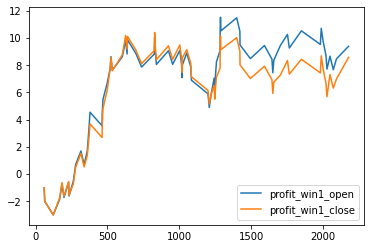

In [26]:
filtered_result_df = segmented_df.loc[
(segmented_df['exp_diff_H_A'] >= 0.697) & (segmented_df['exp_diff_03_H_A'] >= 0.52)
]
utils.print_home_win_result(filtered_result_df)